# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [1]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


In [2]:
df.dtypes
df.describe()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,...,TotalEBCT,Footprint,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,AbstractedVolume
count,79.000000,63.000000,75.000000,77.000000,69.000000,46.000000,45.000000,45.000000,45.000000,63.000000,...,40.000000,75.000000,40.000000,28.000000,72.000000,66.000000,52.000000,75.000000,49.000000,7.900000e+01
mean,6.253165,218.548317,11.701130,5084.251052,39.444947,149.741718,1.182889,24.597778,18.201472,60.364608,...,39.814000,77.606708,933.232182,2.553929,312.084063,2.958973,31.658679,18.293085,24.396803,1.098328e+06
std,4.046107,276.007063,8.713576,8915.477406,35.830905,60.124935,0.607748,27.950415,11.662481,23.630246,...,28.006186,74.700616,691.185500,3.976901,205.220383,5.505880,11.599788,14.290136,18.823818,1.854600e+06
min,1.000000,6.500000,1.327323,250.000000,0.800000,80.000000,0.500000,1.400000,1.725520,15.335576,...,4.890000,8.352477,90.809524,1.372000,40.743665,0.073715,0.469337,2.576075,2.459016,6.710000e+03
25%,3.000000,61.665000,4.908739,1500.000000,15.000000,101.000000,0.800000,5.000000,9.290160,40.881888,...,21.932500,30.610861,479.003472,1.469750,166.430789,0.999476,28.112067,8.697479,10.394265,2.427655e+05
50%,5.000000,120.000000,10.178760,3250.000000,30.000000,139.000000,1.000000,9.000000,18.000000,63.279585,...,32.440000,59.830096,842.857154,1.639000,258.637091,1.525787,30.889453,15.097670,19.402985,5.980330e+05
75%,8.000000,257.650000,14.986250,5000.000000,50.000000,173.750000,1.400000,35.000000,22.508998,78.567831,...,47.232500,94.377094,1090.541768,2.063500,433.805656,2.260182,35.800161,23.851035,35.714286,1.216296e+06
max,20.000000,1426.000000,47.940002,63000.000000,169.550000,310.000000,4.000000,150.000000,60.686602,117.396568,...,154.180000,448.614229,2891.666665,22.690000,1130.094353,35.386015,68.022071,96.433289,86.013986,1.145478e+07


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage per column:")
print(missing_percentages)

# Check data types
print("\nData types:")
print(df.dtypes)

Missing values percentage per column:
WaterworksName                0.000000
TotalFilters                  0.000000
MaxTypicalFlow               20.253165
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
AverageBackwashVolume        12.658228
PrimaryTrigger                0.000000
AverageTotalFilterDepth      41.772152
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageFilterBedVolume       43.037975
FilterExploitation           20.253165
AerationType                  0.000000
OxygenFactor                  0.000000
Stage1HLR                    26.582278
TotalEBCT                    49.367089
Footprint                     5.063291
SumOfld_layer                49.367089
UniformityCoefficient        64.556962
UFRV                          8.860759
BW%                          16.455696
HLR_BW                       34.177215
TankCapacity                  5.063291
TankExploitation             37.974684
GravityPressureMixed      

In [5]:
df_clean = df.copy()

In [6]:
# Remove WaterworksName as it's just an identifier - reduce noise
df_clean = df_clean.drop('WaterworksName', axis=1)

In [7]:
# Remove columns with too many missing values (>50%)
columns_to_drop = missing_percentages[missing_percentages > 50].index
df_clean = df_clean.drop(columns_to_drop, axis=1)

For remaining columns, we can use the appropriate imputation  method to handle missing data:
- numerical columns: median or mean, or  imputation using regression or K-Nearest Neighbors (KNN)

- categorical columns: mode

In [8]:
# Impute numerical columns with median
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())

# Impute categorical columns with mode
categorical_columns = df_clean.select_dtypes(include=['object']).columns
df_clean[categorical_columns] = df_clean[categorical_columns].fillna(df_clean[categorical_columns].mode().iloc[0])

In [9]:
# One-hot encode categorical variables
# For 'Stages', we might want to ordinal encode instead since it has natural ordering
stages_mapping = {'Single': 1, 'Double': 2}
df_clean['Stages'] = df_clean['Stages'].map(stages_mapping)

# One-hot encode all other categorical variables
df_clean = pd.get_dummies(df_clean, columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType'])

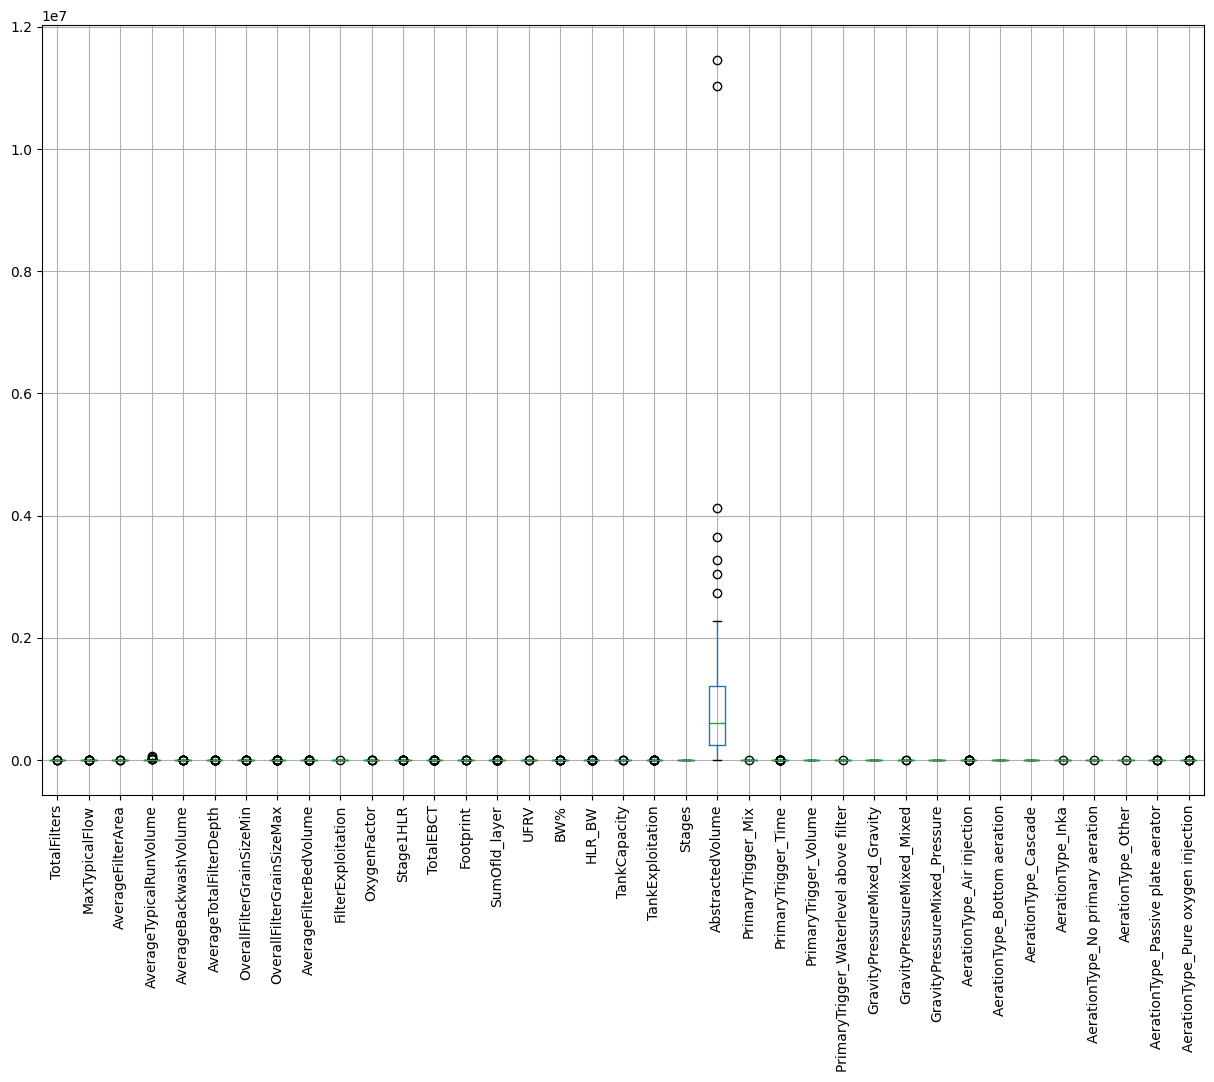

In [10]:
# Create box plots to visualize outliers
plt.figure(figsize=(15, 10))
df_clean.boxplot()
plt.xticks(rotation=90)
plt.show()

# Optional: Remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

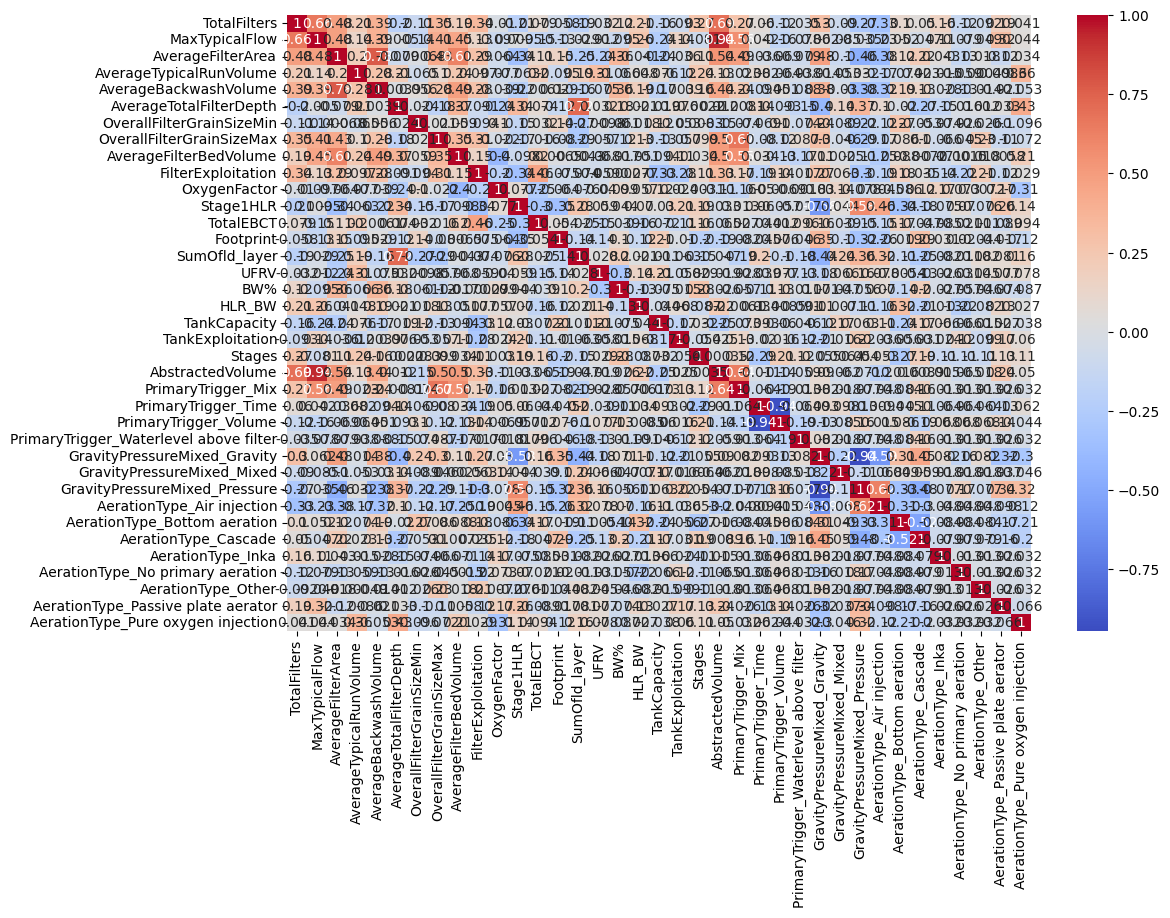

In [12]:
# Create correlation matrix
correlation_matrix = df_clean.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Categorical columns: Index(['PrimaryTrigger', 'AerationType', 'GravityPressureMixed', 'Stages'], dtype='object')
Numeric columns: Index(['TotalFilters', 'MaxTypicalFlow', 'AverageFilterArea',
       'AverageTypicalRunVolume', 'AverageBackwashVolume',
       'AverageTotalFilterDepth', 'OverallFilterGrainSizeMin',
       'OverallFilterGrainSizeMax', 'AverageFilterBedVolume',
       'FilterExploitation', 'OxygenFactor', 'Stage1HLR', 'TotalEBCT',
       'Footprint', 'SumOfld_layer', 'UniformityCoefficient', 'UFRV', 'BW%',
       'HLR_BW', 'TankCapacity', 'TankExploitation', 'AbstractedVolume'],
      dtype='object')


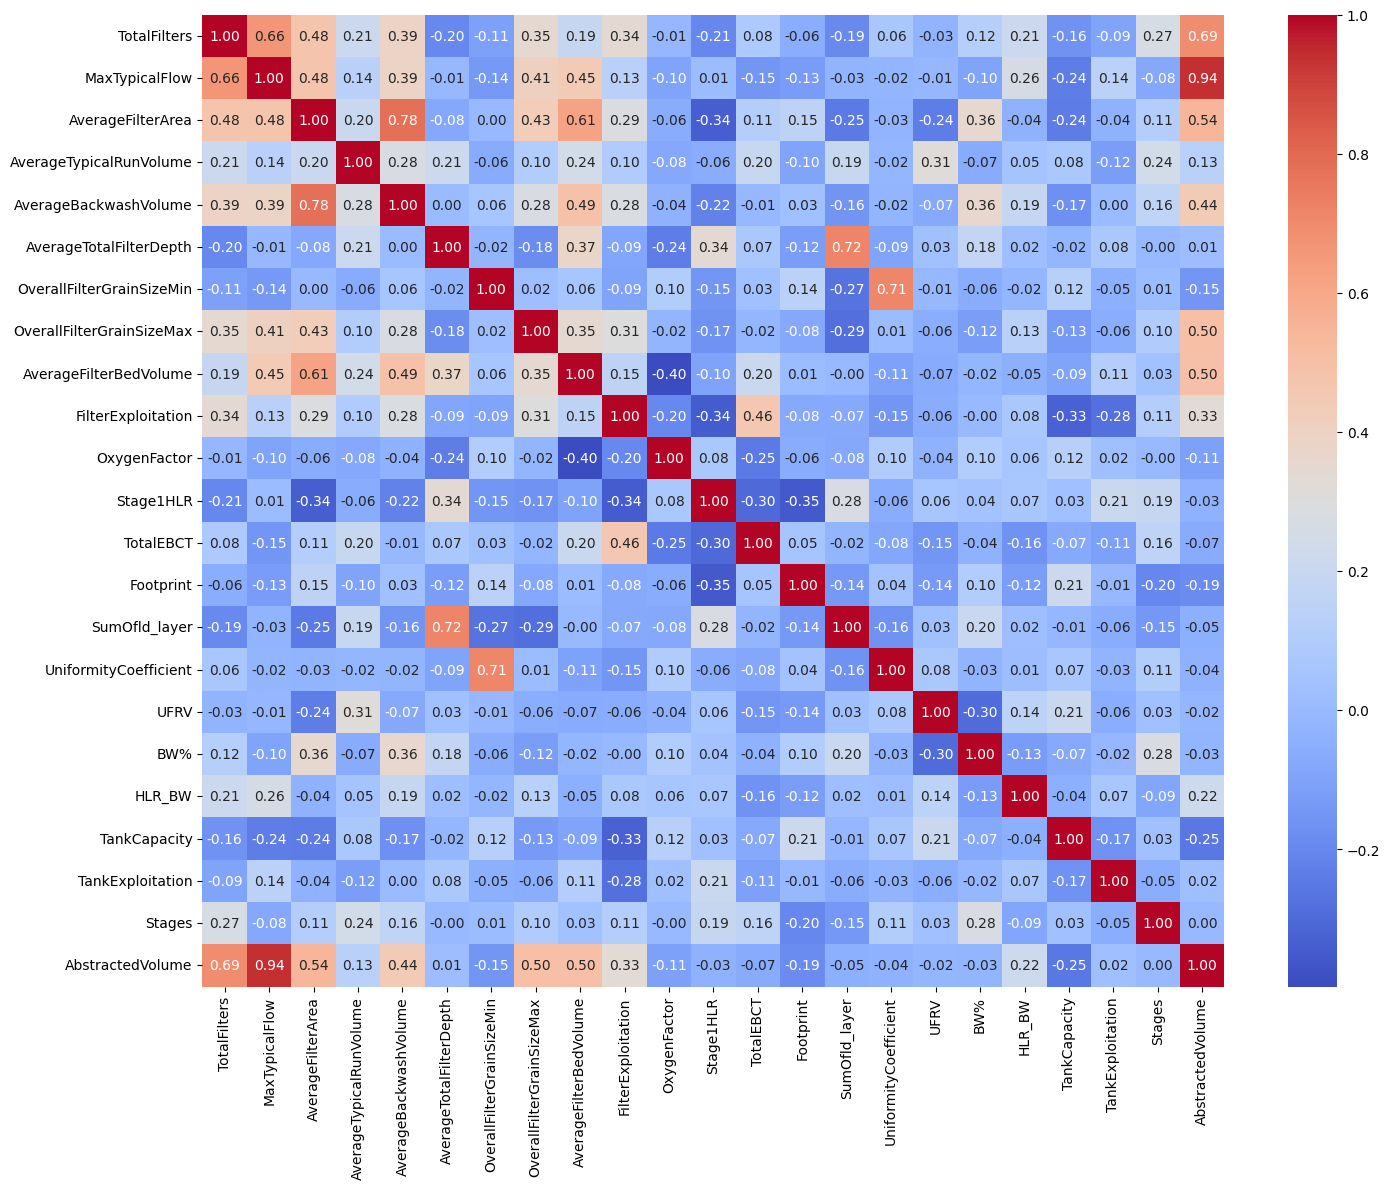

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_excel("merkur.xlsx")

# 2. Remove identifier column
df_clean = df.drop('WaterworksName', axis=1)

# 3. Identify numeric and categorical columns
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns)

# 4. Handle categorical variables
# For 'Stages', use ordinal encoding
stages_mapping = {'Single': 1, 'Double': 2}
df_clean['Stages'] = df_clean['Stages'].map(stages_mapping)

# One-hot encode all other categorical variables
df_clean = pd.get_dummies(df_clean, columns=['PrimaryTrigger', 'GravityPressureMixed', 'AerationType'])

# 5. Handle missing values in numeric columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].median())

# 6. Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numeric_columns])
df_clean[numeric_columns] = scaled_features

# 7. Create correlation matrix using only numeric columns
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# 8. Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()